In [13]:
import requests, pandas, io, geopandas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import contextily as cx
#Our python libraries from flox

In [14]:
#let's grab some data from a known good data source to see what food businesses there are in the whole county
data = requests.get('https://data.wprdc.org/datastore/dump/112a3821-334d-4f3f-ab40-4de1220b1a0a').content

In [15]:
df = pandas.read_csv(io.StringIO(data.decode('utf-8')))

In [16]:
df

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,1969-01-01,NaN,60.0,NaN,NaN,1,1.0,-79.795408,40.389352,830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,1984-06-17,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,1987-03-01,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,1984-06-17,NaN,75.0,NaN,NaN,1,1.0,-80.135185,40.355935,540 3rd Avenue PA 15017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27853,202208120007,Democratic Committee of Findlay Township,62,Trotter Lane,Clinton,PA,15026.0,All Municipalities,333,Temporary,...,NaN,NaN,NaN,NaN,NaN,9,NaN,-80.317673,40.479515,62 Trotter Lane PA 15026
27854,202208120005,Tin Front,216,8th Avenue,Homestead,PA,15120.0,Homestead,201,Restaurant with Liquor,...,2022-08-12,NaN,30.0,NaN,NaN,9,1.0,-79.913724,40.404631,216 8th Avenue PA 15120
27855,202208130001,Papâs Preserves,821,Logan street Street,Carnegie,PA,15106.0,All Municipalities,333,Temporary,...,NaN,NaN,NaN,NaN,NaN,9,NaN,-80.097515,40.401188,821 Logan street Street PA 15106
27856,202208130002,Smokin Tâs BBQ,22855,Drake Road,Cleveland,OH,44146.0,All Municipalities,333,Temporary,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,22855 Drake Road OH 44146


In [17]:
#downloaded from https://catalog.data.gov/dataset/tiger-line-shapefile-2019-county-allegheny-county-pa-topological-faces-polygons-with-all-geocod and unzipped. You can do the same and change the value below to your value
ac = geopandas.read_file('ac_shapefiles/tl_2019_42003_faces.shp')

In [18]:
#Here we can turn the data we read in above into a geodataframe
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

In [19]:
gdf

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address,geometry
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,NaN,60.0,NaN,NaN,1,1.0,-79.795408,40.389352,830 Sylvan Ave PA 15137,POINT (-79.79541 40.38935)
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,NaN,35.0,NaN,NaN,7,NaN,-79.863828,40.428111,128-30 Ormsby Ave PA 15210,POINT (-79.86383 40.42811)
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,NaN,41.0,NaN,NaN,7,1.0,-80.039348,40.390970,3113 W Liberty Ave PA 15216,POINT (-80.03935 40.39097)
3,10707,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,Box 39 PA 15064,POINT EMPTY
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,NaN,75.0,NaN,NaN,1,1.0,-80.135185,40.355935,540 3rd Avenue PA 15017,POINT (-80.13519 40.35593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27853,202208120007,Democratic Committee of Findlay Township,62,Trotter Lane,Clinton,PA,15026.0,All Municipalities,333,Temporary,...,NaN,NaN,NaN,NaN,9,NaN,-80.317673,40.479515,62 Trotter Lane PA 15026,POINT (-80.31767 40.47952)
27854,202208120005,Tin Front,216,8th Avenue,Homestead,PA,15120.0,Homestead,201,Restaurant with Liquor,...,NaN,30.0,NaN,NaN,9,1.0,-79.913724,40.404631,216 8th Avenue PA 15120,POINT (-79.91372 40.40463)
27855,202208130001,Papâs Preserves,821,Logan street Street,Carnegie,PA,15106.0,All Municipalities,333,Temporary,...,NaN,NaN,NaN,NaN,9,NaN,-80.097515,40.401188,821 Logan street Street PA 15106,POINT (-80.09751 40.40119)
27856,202208130002,Smokin Tâs BBQ,22855,Drake Road,Cleveland,OH,44146.0,All Municipalities,333,Temporary,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,22855 Drake Road OH 44146,POINT EMPTY


In [20]:
#businesses with the code status="7" are currently still operating 
inbusiness = gdf[~gdf['status'].isin([7])]

In [21]:
#our analysis cares about these classes of business from the many available
fo_classes = inbusiness[inbusiness['description'].isin(['Packaged Food Only','Seasonal/Farmers Market','Supermarket','Chain Retail/Convenience Store','Hotels - Limited Menu Food Service','Restaurant with Liquor','Chain Packaged Food Only','Chain Supermarket','Retail/Convenience Store','Chain Bakery','Chain Restaurant with Liquor','Chain Restaurant without Liquor','Social Club-Bar Only',])]

<AxesSubplot:>

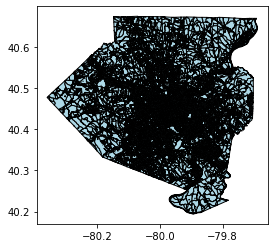

In [22]:
#from our entire allegheny county shapefile with all census tracts
ac.plot( color='lightblue', edgecolor='black')

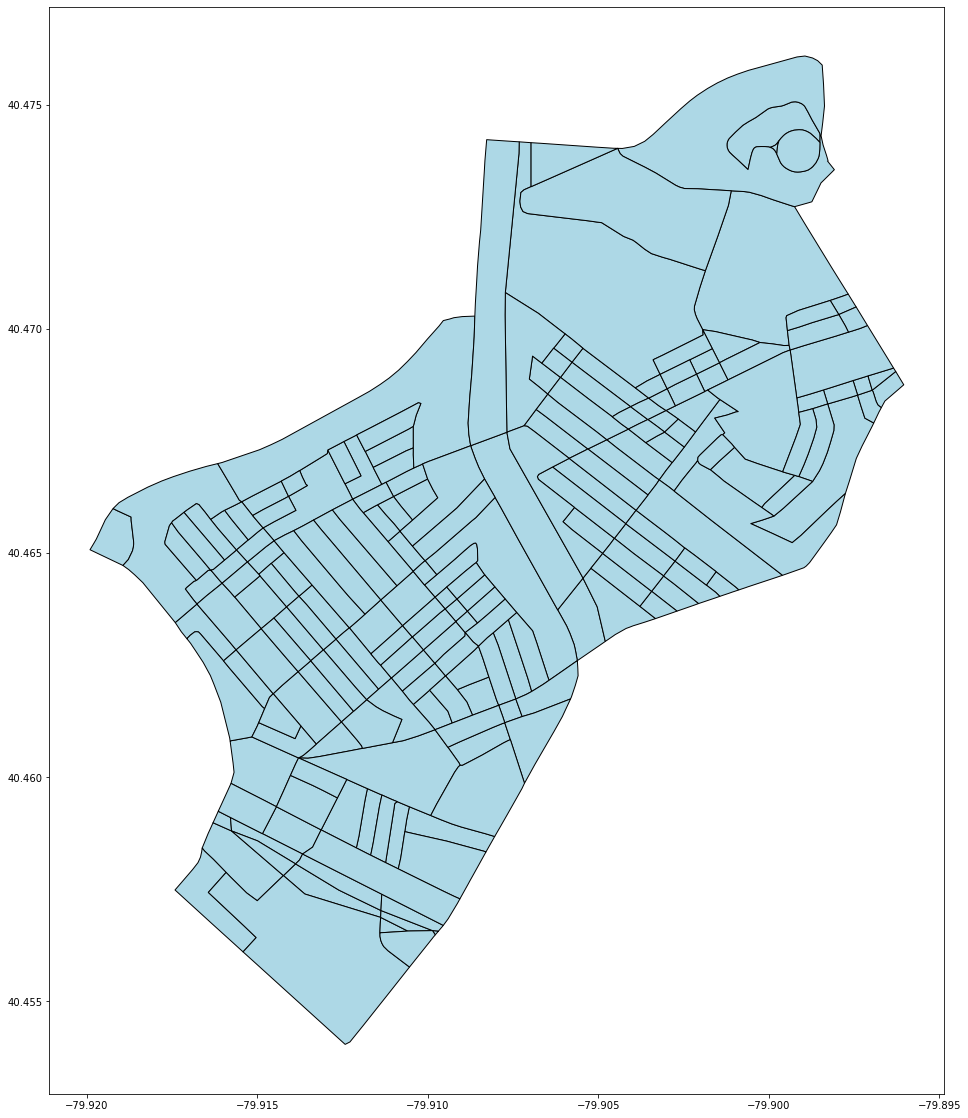

In [23]:
#from our county shapefile, we can find the census tracts we care about, and display a plot of them
larimerplot = ac[ac['TRACTCE10'].isin(['120400','120300','120800'])].plot(figsize=(20, 20), color='lightblue', edgecolor='black')

In [24]:
#let's create a new revised shapefile dataframe with just these tracts
larimer = ac[ac['TRACTCE10'].isin(['120400','120300','120800'])]

In [25]:
larimer

,TFID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,BLOCKCE10,SUFFIX1CE,ZCTA5CE10,UACE10,PUMACE10,...,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,geometry
659,210181661,42,003,120300,1,1029,None,15206,69697,01701,...,None,None,None,None,L,N,8133,+40.4672243,-79.9037436,"POLYGON ((-79.90476 40.46752, -79.90412 40.467..."
1207,265511648,42,003,120300,1,1003,None,15206,69697,01701,...,None,None,None,None,L,N,90450,+40.4712715,-79.9001803,"POLYGON ((-79.90218 40.47050, -79.90210 40.470..."
1277,249366099,42,003,120800,1,1021,None,15206,69697,01701,...,None,None,None,None,L,N,9571,+40.4653280,-79.9191555,"POLYGON ((-79.91980 40.46520, -79.91972 40.465..."
1282,210181705,42,003,120300,2,2015,None,15206,69697,01701,...,None,None,None,None,L,N,3184,+40.4686584,-79.8965285,"POLYGON ((-79.89697 40.46863, -79.89683 40.468..."
1726,210181571,42,003,120800,2,2022,None,15206,69697,01701,...,None,None,None,None,L,N,9209,+40.4587894,-79.9139949,"POLYGON ((-79.91477 40.45886, -79.91470 40.458..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35703,224250094,42,003,120800,2,2034,None,15206,69697,01701,...,None,None,None,None,L,N,4221,+40.4582626,-79.9146633,"POLYGON ((-79.91499 40.45858, -79.91485 40.458..."
35731,210201221,42,003,120300,1,1039,None,15206,69697,01701,...,None,None,None,None,L,N,3191,+40.4689846,-79.9026558,"POLYGON ((-79.90319 40.46898, -79.90301 40.469..."
35803,224223265,42,003,120300,1,1002,None,15206,69697,01701,...,None,None,None,None,L,N,8806,+40.4739675,-79.8991342,"POLYGON ((-79.89975 40.47405, -79.89974 40.474..."
36059,224227576,42,003,120800,2,2013,None,15206,69697,01701,...,None,None,None,None,L,N,6349,+40.4599870,-79.9132015,"POLYGON ((-79.91392 40.46021, -79.91388 40.460..."


In [26]:
#checking out the geospatial metadata on our shapefiles
larimer.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [27]:
#we need to change our dataframe crs epsg code to match, 
#so that we can can use it agains the shapefile to find
#entries that are located within our larimer bounds
fo_classes.crs = 4269

In [28]:
fo_classes.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [29]:
#geopandas lets us join the shapefile data frame, and the list of businesses geodata frame, and return only those businesses
#that are "within" the shapefile designated area
joined = geopandas.sjoin(fo_classes, larimer, op="within")

/nix/store/iln5zly5hlnckx91m075cbfi6jsn3klh-python3.10-ipython-8.4.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [30]:
joined.head()

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,CBSAFP,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON
463,57827,Greyhound Frankstown Sunoco A Plus,6481,Frankstown Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,114,Chain Retail/Convenience Store,...,38300,None,None,None,None,L,N,6668,+40.4608154,-79.9141817
8417,44534,Myer's Exxon Shop,6680,Frankstown Ave,Pittsburgh,PA,15206.0,Pittsburgh-112,114,Chain Retail/Convenience Store,...,38300,None,None,None,None,L,N,10450,+40.4587958,-79.9094768
9379,46734,L A Grocery,511,Larimer Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,113,Retail/Convenience Store,...,38300,None,None,None,None,L,N,18906,+40.4662415,-79.9133615
9851,7695,Broadway Cafe Inc,414,Larimer Ave,Pittsburgh,PA,15206.0,Pittsburgh-112,201,Restaurant with Liquor,...,38300,None,None,None,None,L,N,3365,+40.4648985,-79.9147505
13604,200403180001,L E Corner Store,601,Lincoln Ave,Pittsburgh,PA,15206.0,Pittsburgh-112,113,Retail/Convenience Store,...,38300,None,None,None,None,L,N,7634,+40.4623761,-79.9079786


<AxesSubplot:>

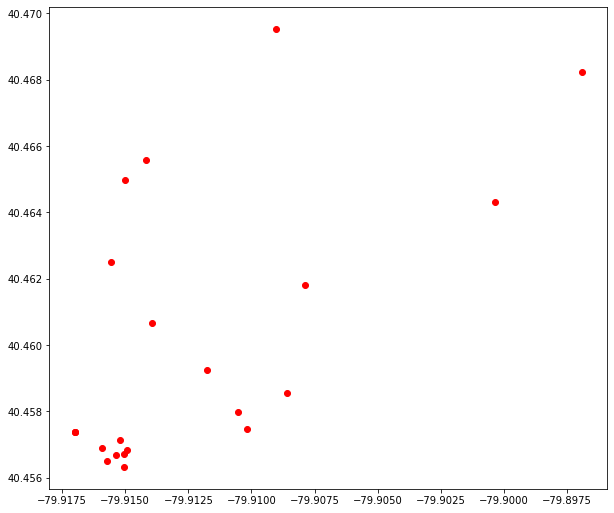

In [31]:
#we can plot and show the businesses we have filetered down to
joined.plot(figsize=(10, 10), color='red')

In [32]:
#but we can do better. let's
# set up an underlying map so we can see where these plot points are
#first we change the combined geodataframe crs project to a Web Mercator
jwm = joined.to_crs(epsg=3857)

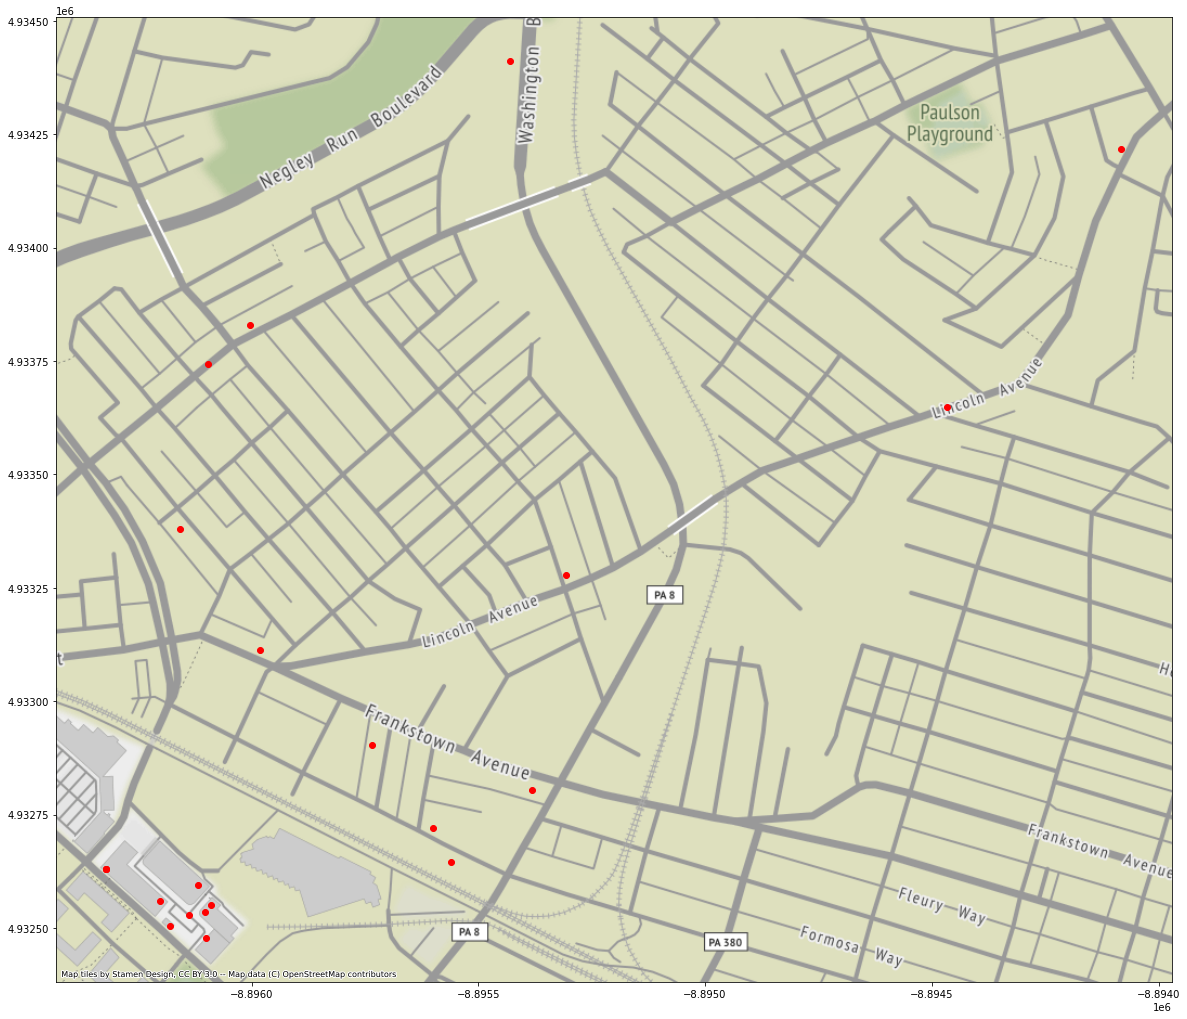

In [33]:
#Now we can replot and then add the basemap thanks
#to our effort to package and include contextily
ax = jwm.plot(figsize=(20, 20), color='red')
cx.add_basemap(ax)

In [34]:
#maybe someone else wants to use our derived data?
joined

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,CBSAFP,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON
463,57827,Greyhound Frankstown Sunoco A Plus,6481,Frankstown Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,114,Chain Retail/Convenience Store,...,38300,None,None,None,None,L,N,6668,+40.4608154,-79.9141817
8417,44534,Myer's Exxon Shop,6680,Frankstown Ave,Pittsburgh,PA,15206.0,Pittsburgh-112,114,Chain Retail/Convenience Store,...,38300,None,None,None,None,L,N,10450,+40.4587958,-79.9094768
9379,46734,L A Grocery,511,Larimer Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,113,Retail/Convenience Store,...,38300,None,None,None,None,L,N,18906,+40.4662415,-79.9133615
9851,7695,Broadway Cafe Inc,414,Larimer Ave,Pittsburgh,PA,15206.0,Pittsburgh-112,201,Restaurant with Liquor,...,38300,None,None,None,None,L,N,3365,+40.4648985,-79.9147505
13604,200403180001,L E Corner Store,601,Lincoln Ave,Pittsburgh,PA,15206.0,Pittsburgh-112,113,Retail/Convenience Store,...,38300,None,None,None,None,L,N,7634,+40.4623761,-79.9079786
16108,201106030004,Jimmy John's,6425,Penn Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,212,Chain Restaurant without Liquor,...,38300,None,None,None,None,L,N,16357,+40.4572367,-79.9162991
23317,201905170008,Elements Cafe @ Google Bakery Square,6425,Penn Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,212,Chain Restaurant without Liquor,...,38300,None,None,None,None,L,N,16357,+40.4572367,-79.9162991
26157,202105030005,Galley @ Bakery Square,145,Bakery Square Boulevard,Pittsburgh,PA,15206.0,Pittsburgh-112,202,Chain Restaurant with Liquor,...,38300,None,None,None,None,L,N,16357,+40.4572367,-79.9162991
26954,202112170001,Alta Via Pizzeria,6425,Penn Avenue,Pittsburgh,PA,15206.0,Pittsburgh-112,201,Restaurant with Liquor,...,38300,None,None,None,None,L,N,16357,+40.4572367,-79.9162991
27801,202208040002,Jeni's Splendid Ice Cream,173,Bakery Square Boulevard,Pittsburgh,PA,15206.0,Pittsburgh-112,212,Chain Restaurant without Liquor,...,38300,None,None,None,None,L,N,16357,+40.4572367,-79.9162991


In [35]:
#let's give them a csv!
joined.to_csv('larimar.csv')